## Observations and Insights

## Dependencies and starter code

What are my three finding in this project
1) Out of the 10 Drug tested Capomulin was the most effective 
2)There were more male rats than female rats 
3) The drug Capomulin casued a liner reduction in weight and tumor 

In [ ]:
%matplotlib notebook

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata = ("data/Mouse_metadata.csv")
mouse_metadata
study_results = ("data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata= pd.read_csv(mouse_metadata)
study_results= pd.read_csv(study_results)
study_results
# mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
# mouse_metadata = mouse_metadata.dropna()
# study_results = pd.read_csv("data/Study_results.csv")
# study_results
#Make them into a dataframe 
# mouse_data=pd.DataFrame(mouse_metadata)
#study_data=pd.DataFrame(study_results)

# Combine the data into a single dataset
Study= pd.merge(mouse_metadata,study_results[["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]],on='Mouse ID')
# Study


FullStudyData=pd.DataFrame(Study)
FullStudyData.head(20)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Timepoint
0,k403,Ramicane,Male,21,16,45.000000,0
1,k403,Ramicane,Male,21,16,38.825898,5
2,k403,Ramicane,Male,21,16,35.014271,10
3,k403,Ramicane,Male,21,16,34.223992,15
4,k403,Ramicane,Male,21,16,32.997729,20
5,k403,Ramicane,Male,21,16,33.464577,25
6,k403,Ramicane,Male,21,16,31.099498,30
7,k403,Ramicane,Male,21,16,26.546993,35
8,k403,Ramicane,Male,21,16,24.365505,40
9,k403,Ramicane,Male,21,16,22.050126,45


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Mean for tumor volume 

Stats=FullStudyData
Stats=pd.DataFrame(FullStudyData)
Stats




#Stats=pd.DataFrame(FullStudyData)
SummaryStats=Stats["Tumor Volume (mm3)"]
SummaryStats

TV_mean= Stats.groupby(["Drug Regimen"]).mean()['Tumor Volume (mm3)']
#print(f"The mean Tumor Volume is {TV_mean}")

TV_median=Stats.groupby(["Drug Regimen"]).median()['Tumor Volume (mm3)']
#print(f"The median Tumor Volume is {TV_median}")

TV_var= Stats.groupby(["Drug Regimen"]).var()['Tumor Volume (mm3)']
#print(f"The varience Tumor Volume is {TV_var}")

TV_std= Stats.groupby(["Drug Regimen"]).std()['Tumor Volume (mm3)']
#print(f"The stander deviation Tumor Volume is {TV_std}")

TV_SEM= Stats.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
print(f"The SEM of Tumor Volume in {TV_SEM}")

# # sample=Stats.sample(30)
# # print(f"The SEM value for the sample Tomor Volume is {sem(sample.Tumor Volume }")








The SEM of Tumor Volume in Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64


In [4]:
#Summary Data set
Stat={"Tumor Volume Mean":TV_mean,"Tumor Volume Median":TV_median, "Tumor Volume Varience": TV_var,
      "Tumor Volume Stander Deviation":TV_std, "Tumor Volume SEM": TV_SEM}
SummaryDrugRegimen=pd.DataFrame(Stat)
SummaryDrugRegimen.head(20)

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Varience,Tumor Volume Stander Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

([<matplotlib.axis.XTick at 0x1a16ed0470>,
 <a list of 10 Text xticklabel objects>)

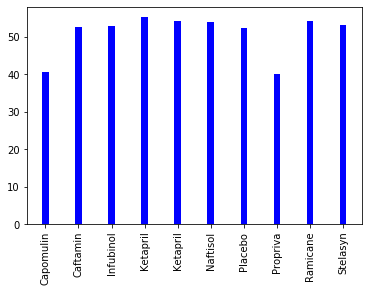

In [5]:
#Bar Plots showing the mean of the Drug Regumin 
Drugs=FullStudyData["Drug Regimen"]

#MeanSummaryTable={"Drugs": Drug Regimen, "Tumor Volume Men": TV_mean}
Druglist=["Capomulin",'Caftamin','Infubinol',"Ketapril", "Ketapril","Naftisol", 'Placebo','Propriva',"Ramicane"
         ,"Stelasyn", "Zoniferol"]
#Druglist=FullStudyData[('Drug Regimen')]
Tumor_R = Stat[('Tumor Volume Mean')]
x_axis=np.arange(len(Tumor_R))
plt.bar(x_axis,Tumor_R, color="b",alpha=1.0, align="center", width=0.2)
tick_locations= [value for value in x_axis]
plt.xticks(tick_locations,Druglist, rotation="vertical")

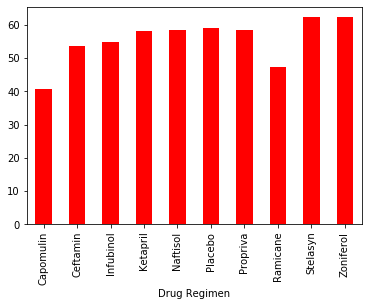

In [43]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#FinalDrugList=Stats["Drug Regimen"]
FinalMeanResults=Stat["Tumor Volume Mean"]
TumorPyPlot=FinalMeanResults.add(x_axis, fill_value=0)
TumorPyPlot.plot(kind="bar",facecolor='red')


Text(0.5, 0, 'Types of Drugs')

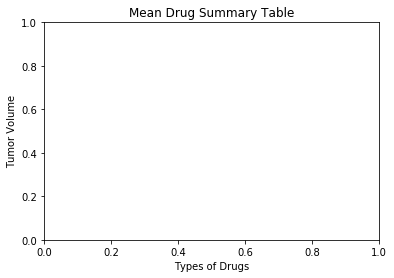

In [44]:
plt.title("Mean Drug Summary Table")
plt.ylabel("Tumor Volume")
plt.xlabel("Types of Drugs")

## Pie plots

In [45]:

PieChartData=Study
PieChartData=pd.DataFrame(Study)
GenderData=PieChartData["Sex"].value_counts()
NewGenderData=pd.DataFrame(GenderData)
NewGenderData

#GenderData

,Sex
Male,958
Female,935


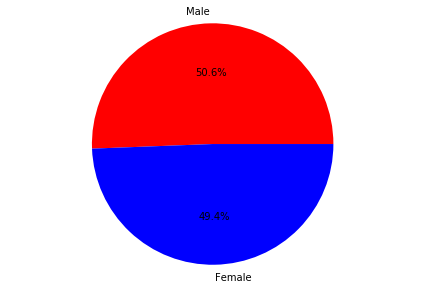

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels=['Male', 'Female']
Data=[958,935]
colors=['red','blue']
plt.pie(Data, labels=labels, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculating the mean volume and group by Drug Regimen 
Top_Drugs=FullStudyData.groupby(["Drug Regimen","Timepoint"]).mean()["Tumor Volume (mm3)"]
Top_Four=pd.DataFrame(Top_Drugs)
Top_Four=Top_Four.reset_index()
Top_Drug_df=Top_Four.pivot(index='Timepoint', columns='Drug Regimen')["Tumor Volume (mm3)"]
Top_Drug_df
# Make a new Data Frame to show the final tumor volume 
# Best=Top_Drug_df[["Capomulin","Ceftamin",'Ramicane','Infubinol']].min()
# NewBest=pd.DataFrame(Best)
# NewBest
D_Capomulin=Top_Drug_df["Capomulin"].min()
D_Ramicane=Top_Drug_df['Ramicane'].min()
D_Ceftamin=Top_Drug_df["Ceftamin"].max()
D_Infubinol=Top_Drug_df["Infubinol"].max()

Tumor_df= {'Capomulin':D_Capomulin,'Ramicane':D_Ramicane,"Ceftamin": D_Ceftamin,"Infubinol": D_Infubinol }
Tumor_df
FinalTumorResult=pd.DataFrame({"Drug Regmimen":Tumor_df})
FinalTumorResult


,Drug Regmimen
Capomulin,36.236114
Ceftamin,64.132421
Infubinol,65.755562
Ramicane,34.955595


In [48]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = FullStudyData['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = FullStudyData.loc[(FullStudyData['Tumor Volume (mm3)'] < lower_bound) | (FullStudyData['Tumor Volume (mm3)'] > upper_bound)]


The lower quartile of occupancy is: 45.0
The upper quartile of occupancy is: 56.29220039
The interquartile range of occupancy is: 11.292200389999998
The the median of occupancy is: 48.95147442 
Values below 28.061699415000003 could be outliers.
Values above 73.230500975 could be outliers.


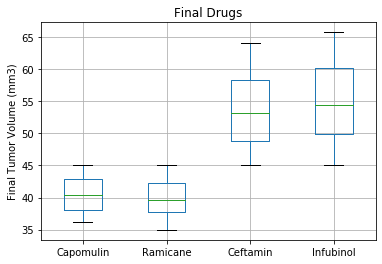

In [74]:
# Show the results of the 4 top Drug Regimian in a box plot
boxplot=Top_Drug_df.boxplot(column=["Capomulin",'Ramicane','Ceftamin','Infubinol'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Drugs')
plt.show()

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
LineTumorVolume=FullStudyData.groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]
LineCapomulin=pd.DataFrame(LineTumorVolume)
LineCapomulin.head(10)

Tumor Volume (mm3)
Drug Regimen Timepoint                    
Capomulin    0                   45.000000
             5                   44.266086
             10                  43.084291
             15                  42.064317
             20                  40.716325
             25                  39.939528
             30                  38.769339
             35                  37.816839
             40                  36.958001
             45                  36.236114

In [49]:
LineCapomulin=LineCapomulin.reset_index()
Timepoint_df=LineCapomulin.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]
Timepoint_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


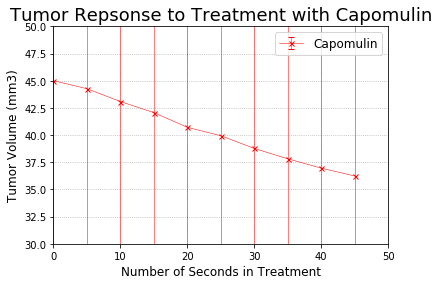

In [65]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.errorbar(Timepoint_df.index, Timepoint_df["Capomulin"], yerr=Timepoint_df["Capomulin"],
            marker="x", color="r", markersize=5, linewidth=0.50, capsize=3, label="Capomulin")

plt.ylim(30,50)
plt.xlim(0, 50)
plt.title("Tumor Repsonse to Treatment with Capomulin", fontsize=18)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.xlabel("Number of Seconds in Treatment", fontsize=12)
plt.grid(linestyle="dotted")
plt.legend(loc="best", fontsize="large", frameon=True)

In [53]:
Sweight=FullStudyData.groupby(["Drug Regimen", "Weight (g)"]).mean()["Tumor Volume (mm3)"]
S_Capomulin=pd.DataFrame(Sweight)
S_Capomulin.head(10)

Tumor Volume (mm3)
Drug Regimen Weight (g)                    
Capomulin    15                   36.182040
             17                   37.214133
             19                   41.182391
             20                   39.141053
             21                   42.088700
             22                   43.288490
             23                   43.341051
             24                   44.805810
             25                   44.062109
Ceftamin     25                   51.035238

In [62]:
S_Capomulin=S_Capomulin.reset_index()
Capomulin_df=S_Capomulin.pivot(index="Weight (g)", columns="Drug Regimen")["Tumor Volume (mm3)"]
Capomulin_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Weight (g),,,,,,,,,,
15,36.182040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.766850,NaN,NaN
17,37.214133,NaN,NaN,NaN,NaN,NaN,NaN,39.112697,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.882878,NaN,NaN
19,41.182391,NaN,NaN,NaN,NaN,NaN,NaN,39.798993,NaN,NaN
20,39.141053,NaN,NaN,NaN,NaN,NaN,NaN,40.954281,NaN,NaN
21,42.088700,NaN,NaN,NaN,NaN,NaN,NaN,40.298004,NaN,NaN
22,43.288490,NaN,NaN,NaN,NaN,NaN,NaN,40.701385,NaN,NaN
23,43.341051,NaN,56.312708,NaN,NaN,NaN,NaN,NaN,NaN,NaN


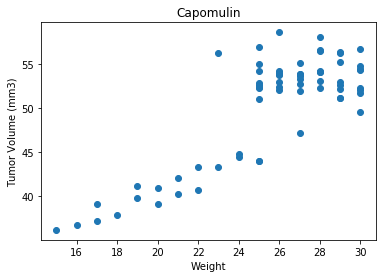

In [63]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#The plot comapres the weight and the tumor volume 
plt.scatter(S_Capomulin.iloc[:,1],S_Capomulin.iloc[:,2])
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin")
plt.show()

The correlation between both factors is 0.84


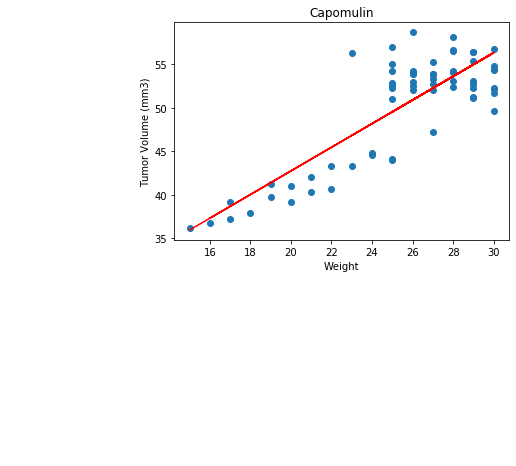

In [72]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight=S_Capomulin.iloc[:,1]
TVolume=S_Capomulin.iloc[:,2]
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, TVolume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(weight,TVolume)
plt.scatter(weight,TVolume)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.plot(weight,regress_values, 'r-')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()